In [351]:
import pandas as pd
import webget
import matplotlib.pyplot as plt
import os
import statistics
from collections import Counter

df = pd.read_csv('ks-projects-201801.csv')

In [253]:
main_category_lst = df['main_category'].value_counts() # return 15 categories
print(main_category_lst)

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64


In [258]:
# 1 ('Theater') 6534
# 2 Publishing 12300
# 3 ('Dance')  2338
# 4 ('Music') 24197
# 5 ('Fashion') 5593
# 6 ('Food') 6085
# 7 ('Comics') 5842
# 8 ('Photography') 3305
# 9 ('Art') 11510
# 10 Design 10550
# 11 Crafts 2115
# 12 Film & Video 23623
# 13 Journalism 1012
# 14 Technology 6434
# 15 Games 12518


1. What main-category of project has the highest success rate?
The highest success rate of project is: Music
The amount are: 96788


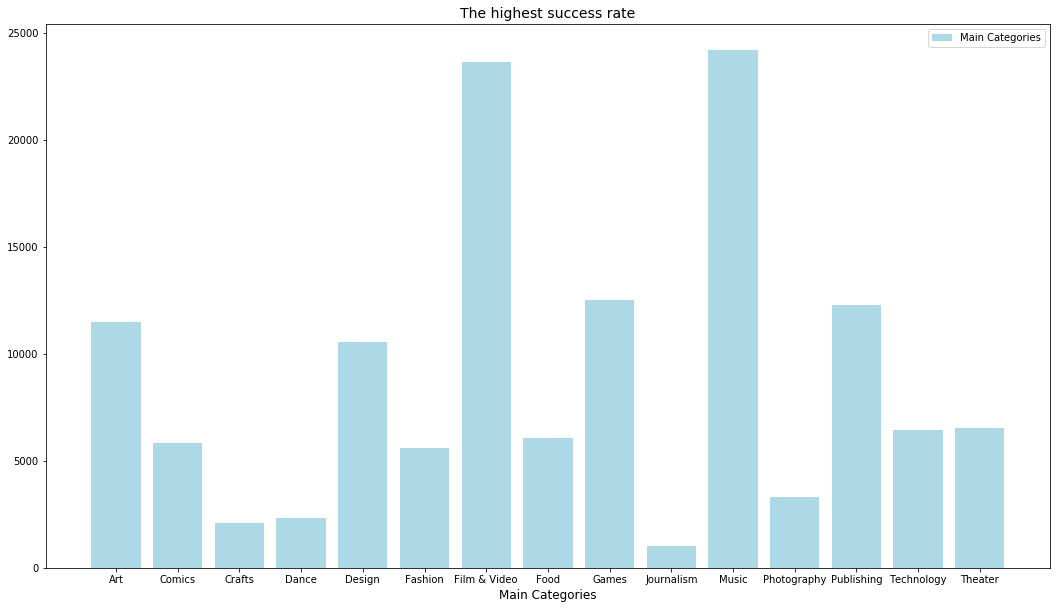

In [268]:
def question1():
    for _, row in df.iterrows():
        if row['state'] == 'successful':
            main_category_lst.append(row['main_category'])
    res_category = max(set(main_category_lst),key=main_category_lst.count)
    print('1. What main-category of project has the highest success rate?')
    print('The highest success rate of project is: {}'.format(res_category))
    # here counter how many Music projects
    def counter_category(lst,cat):
        counter = 0
        for idx in lst:
            if idx == cat:
                counter +=1
        return counter
    cat_amount = counter_category(main_category_lst,'Music')
    print('The amount are: {}'.format(cat_amount))
    x = list(set(main_category_lst))
    # list of success main-cagegory project amount
    y = [6534,12300,2338,24197,5593,6085,5842,3305,11510,10550,2115,23623,1012,6434,12518]
    plt.figure(figsize=(18,10))
    plt.bar(x,y, align='center',color = 'lightblue',label='Main Categories')
    plt.title('The highest success rate',fontsize = 14)
    plt.xlabel('Main Categories',fontsize= 12)
    plt.legend()
    plt.show()
    #plt.savefig(os.path.join('highest_succes_rate.png'), dpi=300, format='png', bbox_inches='tight')
question1()

In [398]:
def question2():
    main_category_series = df['main_category'].value_counts()
    print('2. For the main-category of project with highest success rate (question above), what is the main-category with the highest number of project proposals?')
    print('The highest number of project proposals is: {} '.format(main_category_series.index[0]))
    main_category_series.plot.bar(color='lightblue',figsize = (8,6),label='words',align='center')
    plt.title('The highest number of project proposals',fontsize = 14)
    plt.xlabel('Main Categories',fontsize= 12)
    #plt.show()
    plt.savefig(os.path.join('highest_number_of_project_proposals.png'), dpi=300, format='png', bbox_inches='tight')
question2()

2. For the main-category of project with highest success rate (question above), what is the main-category with the highest number of project proposals?
The highest number of project proposals is: Film & Video 


In [169]:
def question3():
    pledged_amout_lst = []
    for _, row in df.iterrows():
        if row['state'] == 'successful':
            pledged_amout_lst.append(row['usd_pledged_real'])
    print('Total amount: {}'.format(len(pledged_amout_lst)))
    median_pledged_amount = statistics.median(pledged_amout_lst)
    print('3. What is the median pledged amount (usd_pledged_real) of successfully funded projects?')
    print('The median pledged amount (usd_pledged_real) of successfully funded projects is: {}'.format(median_pledged_amount))

question3()

133956
The median pledged amount (usd_pledged_real) of successfully funded projects is: 5107.25


4. What is the number of successfully funded projects with more than 5.000$ pledged (usd_pledged_real) per main-category?
The number of successfully funded projects with more than 5.000$ pledged is: ('Film & Video', 12505) 


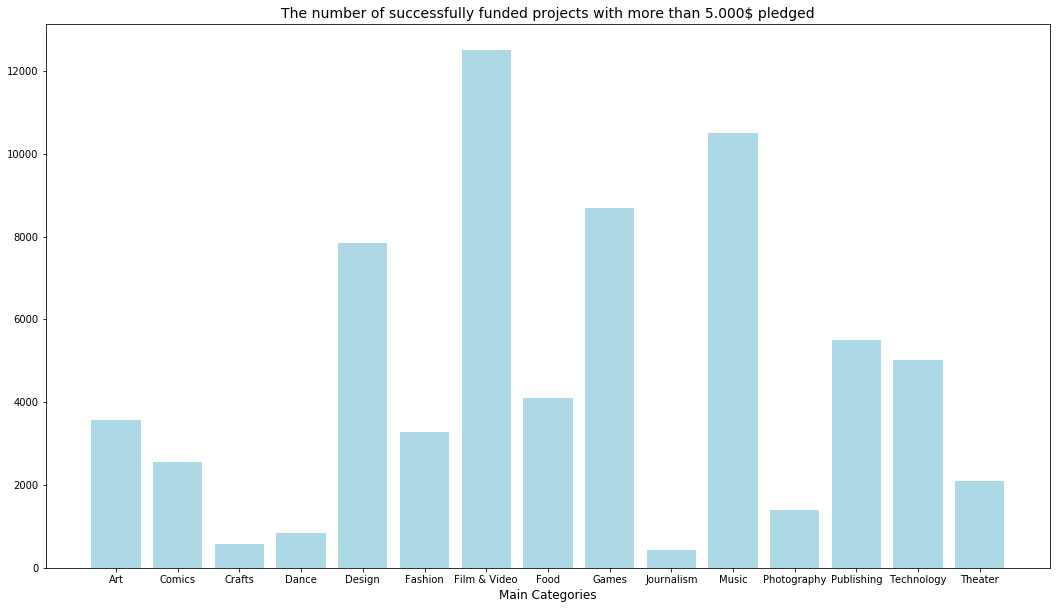

In [270]:
def question4():
    categories = []
    for _, row in df.iterrows():
        if row['state'] == 'successful':
            if row['usd_pledged_real'] >= 5000:
                categories.append(row['main_category'])
    counter_categories =Counter(categories)
    res = list(counter_categories.most_common(1))
    print('4. What is the number of successfully funded projects with more than 5.000$ pledged (usd_pledged_real) per main-category?')
    print('The number of successfully funded projects with more than 5.000$ pledged is: {} '.format(res[0]))
    lables,values =  zip(*Counter(categories).items())
    plt.figure(figsize=(18,10))
    plt.bar(lables,values,align='center',color = 'lightblue',label='Main Categories')
    plt.title('The number of successfully funded projects with more than 5.000$ pledged',fontsize = 14)
    plt.xlabel('Main Categories',fontsize= 12)
    plt.show()
    #plt.savefig(os.path.join('number_of_success_project_more_than_5000.png'), dpi=300, format='png', bbox_inches='tight')
question4()


In [273]:
def question5():
    df['main_category']

In [272]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [277]:
len(df['usd_goal_real'])

378661

In [393]:
def question5():
    fst_lst,sec_lst, trd_lst, fourth_lst, fifth_lst,six_lst = [], [], [], [], [], []
    for _, row in df.iterrows():
        if row['usd_goal_real'] <= 10000:
            fst_lst.append(row['main_category'])
        if row['usd_goal_real'] > 10000 and row['usd_goal_real'] <= 20000:
            sec_lst.append(row['main_category'])
        if row['usd_goal_real'] > 20000 and row['usd_goal_real'] <= 30000:
            trd_lst.append(row['main_category'])
        if row['usd_goal_real'] > 30000 and row['usd_goal_real'] <= 40000:
            fourth_lst.append(row['main_category'])
        if row['usd_goal_real'] > 40000 and row['usd_goal_real'] <= 50000:
            fifth_lst.append(row['main_category'])
        if row['usd_goal_real'] > 50000 :
            six_lst.append(row['main_category'])
    print('the most successfully funded projects,the amount range (usd_goal_real)')
    print('Range 0 - 10k$ are: {}'.format(list(Counter(fst_lst).most_common())))
    print('Range 10k - 20k are: {}'.format(list(Counter(sec_lst).most_common())))
    print('Range 20k - 30k are: {}'.format(list(Counter(trd_lst).most_common())))
    print('Range 30k - 40k are: {}'.format(list(Counter(fourth_lst).most_common())))
    print('Range 40k - 50k are: {}'.format(list(Counter(fifth_lst).most_common())))
    print('Range 60k and more are: {}'.format(list(Counter(six_lst).most_common())))
    lables, values = zip(*Counter(fst_lst).items())
    plt.figure(figsize=(18,10))
    plt.bar(lables,values,align='center',color = 'lightblue',label='Main Categories')
    plt.title('The most successfully funded projects range 0-10k$ ',fontsize = 14)
    plt.xlabel('Main Category',fontsize= 12)
    #plt.show()
    plt.savefig(os.path.join('10k.png'), dpi=300, format='png', bbox_inches='tight')
question5()


the most successfully funded projects,the amount range (usd_goal_real)
Range 0 - 10k$ are: [('Music', 42692), ('Film & Video', 40203), ('Publishing', 30876), ('Art', 23370), ('Games', 20875), ('Fashion', 15273), ('Design', 15179), ('Food', 12829), ('Technology', 12407), ('Theater', 9066), ('Comics', 8925), ('Photography', 8443), ('Crafts', 7452), ('Journalism', 3382), ('Dance', 3272)]
Range 10k - 20k are: [('Film & Video', 8449), ('Games', 5504), ('Design', 5434), ('Music', 5339), ('Technology', 4798), ('Publishing', 4734), ('Food', 4373), ('Fashion', 3593), ('Art', 2215), ('Photography', 1263), ('Comics', 1072), ('Theater', 838), ('Crafts', 693), ('Journalism', 522), ('Dance', 274)]
Range 20k - 30k are: [('Film & Video', 4317), ('Technology', 3497), ('Design', 3097), ('Games', 2598), ('Food', 2489), ('Publishing', 1875), ('Fashion', 1721), ('Music', 1614), ('Art', 890), ('Photography', 478), ('Comics', 369), ('Theater', 330), ('Journalism', 274), ('Crafts', 237), ('Dance', 82)]
Range 

In [354]:
df.loc[df['usd_goal_real']==166361390.71000001]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
47803,1243678698,FUCK Potato Salad. Paleo Potato Brownies!,Food,Food,GBP,2014-08-08,99000000.0,2014-07-09 00:24:34,0.0,failed,0,GB,0.0,0.0,1.663614e+08


In [403]:
lables, values = zip(*Counter(six_lst).items())
plt.figure(figsize=(18,10))
plt.bar(lables,values,align='center',color = 'lightblue',label='Main Categories')
plt.title('The most successfully funded projects range 60 > 170000 k$ ',fontsize = 14)
plt.xlabel('Main Category',fontsize= 12)
#plt.show()
plt.savefig(os.path.join('60k.png'), dpi=300, format='png', bbox_inches='tight')

In [ ]:
fst_lst,sec_lst, trd_lst, fourth_lst, fifth_lst,six_lst